In [1]:
#point to lunar library locally
import sys
sys.path.append('/Users/oakley/Documents/GitHub/lunar')


# Import the required functions from your lunar library
from lunar.find_contours import find_contours_from_videos
from lunar.plot_contours import plot_contours
from lunar.identify_glare import process_large_file
from lunar.label_tanx import analyze_contours
from lunar import match_cameras
from lunar import plot_matched
from lunar.smooth_contours import smooth_contours, smooth_contours_sem
from lunar.plot_glare_contours import plot_glare_contours
from lunar.identify_glare import clip_ends



In [3]:
# Define parameters for processing first video
video_pattern = '/Users/oakley/Downloads/out_*.mp4'
output_suffix = '22Jul2024.tsv'
black_threshold = 200
min_area = 15
max_area = 1000
brightness_threshold = 100
threads = 2


# Process video and generate contours file
# This takes several hours to process
# Change to code to execute if necessary

find_contours_from_videos(
    video_pattern=video_pattern,
    black=black_threshold,
    minArea=min_area,
    maxArea=max_area,
    brightnessThreshold=brightness_threshold,
    threads=threads,
    outfile=output_suffix
)


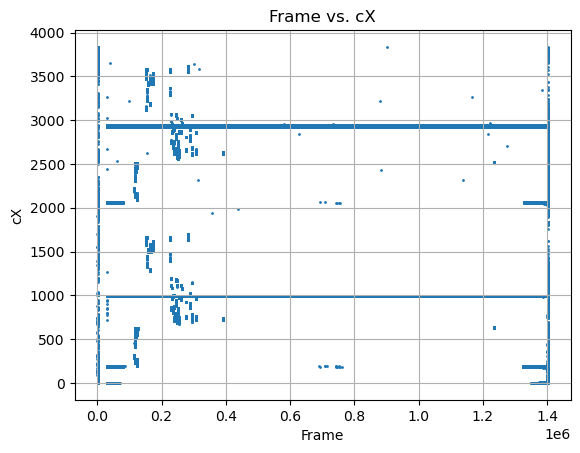

In [5]:
# Plot the contours data
output_file = '../data/contours_' + output_suffix
plot_contours(output_file)

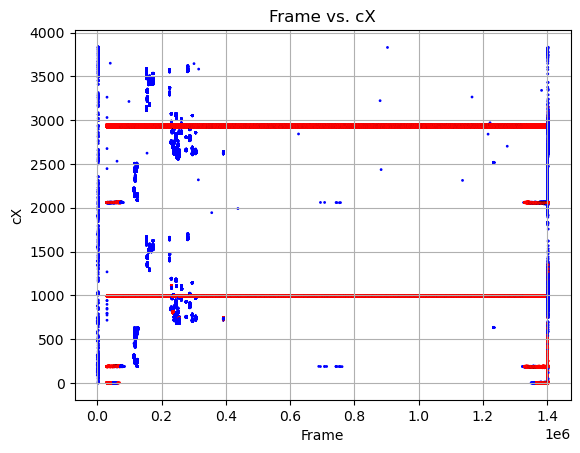

In [6]:
# Identify glare in contour file
process_large_file(
    input_file='../data/contours_' + output_suffix,
    output_file='../data/glare_' + output_suffix,
    min_cluster_size=4000,  #Will only be marked as glare if there are more than this number of contours together in the same cluster. Higher numbers should yield less glare
    eps=0.3,    #Defines the maximum normalized distance (based on x,y,frame) for two points to be allowed to be in the same cluster. Lower numbers should separate clusters more, 
    #which could be useful if signals are getting clustered with glare
    min_samples=50, #The minimum number of contours (data points) required for a group to be considered a cluster.
    chunksize=100000    #The number of frames to analyze at a time to manage memory
)

# Plot the glare-processed results
plot_contours('../data/glare_' + output_suffix, glare=True)  # Change last to True to color by cluster

In [6]:
clip_ends(
    input_file = '../data/glare_' + output_suffix,
    output_file = '../data/vglare_' + output_suffix,
    low_clip = 90000,
    hi_clip = 1340000
)

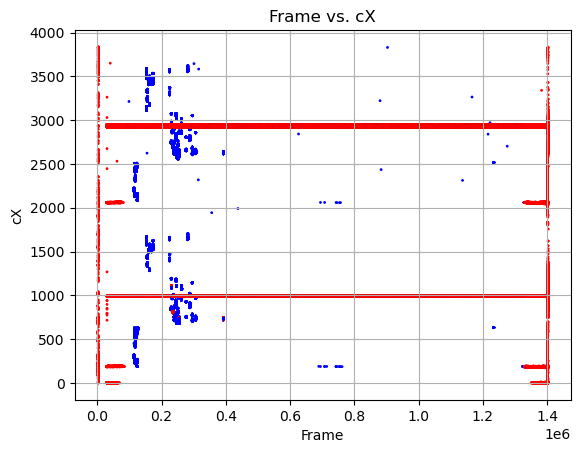

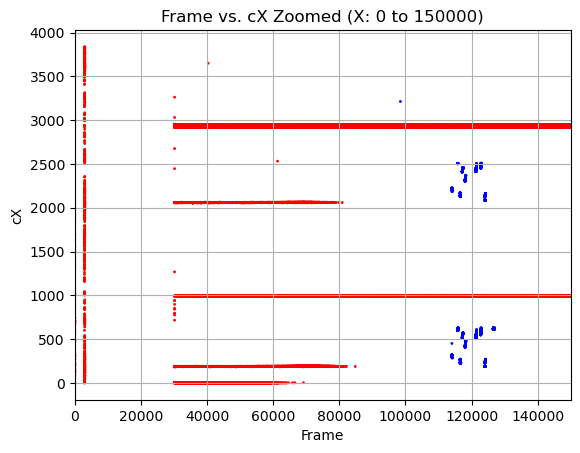

In [7]:
# Plot the glare-processed results
plot_contours('../data/vglare_' + output_suffix, glare=True, zoomx=(0,150000))  # Change last to True to color by cluster

In [8]:
# Analyze the contours to label tanks
tank_boundaries = [185, 655, 1210, 1705, 2062, 2525, 3096, 3635]
analyze_contours('../data/vglare_' + output_suffix, tank_boundaries)

Removed 4811753 rows labeled as glare.
Analysis complete. Results saved to analyzed_vglare_22Jul2024.tsv


,frame,cX,cY,area,minI,maxI,meanI,video,glare,camera,tank,cXtank
244243,91097,2922.0,503.0,63.5,202.0,255.0,232.487179,/home/local/ADS/oakley/labdata/users/McKinley/...,no,right,right_tank2,397.0
244809,91339,2923.0,504.0,64.5,201.0,255.0,235.382716,/home/local/ADS/oakley/labdata/users/McKinley/...,no,right,right_tank2,398.0
244811,91340,2923.0,504.0,65.5,201.0,255.0,235.670732,/home/local/ADS/oakley/labdata/users/McKinley/...,no,right,right_tank2,398.0
245121,91470,992.0,406.0,30.0,203.0,255.0,236.190476,/home/local/ADS/oakley/labdata/users/McKinley/...,no,left,left_tank2,337.0
246678,92120,2947.0,493.0,63.5,202.0,255.0,233.197531,/home/local/ADS/oakley/labdata/users/McKinley/...,no,right,right_tank2,422.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4435182,1337911,187.0,710.0,116.5,0.0,255.0,213.534247,/home/local/ADS/oakley/labdata/users/McKinley/...,no,left,left_tank1,2.0
4435509,1337974,991.0,426.0,60.5,201.0,255.0,240.693333,/home/local/ADS/oakley/labdata/users/McKinley/...,no,left,left_tank2,336.0
4443598,1339494,2948.0,495.0,98.5,201.0,255.0,224.771186,/home/local/ADS/oakley/labdata/users/McKinley/...,no,right,right_tank2,423.0
4445259,1339799,2060.0,747.0,98.5,201.0,251.0,224.322034,/home/local/ADS/oakley/labdata/users/McKinley/...,no,right,noise,NaN


In [4]:
match_cameras(
    '../data/analyzed_vglare_' + output_suffix,  # Input file
    '../data/matched_' + output_suffix,         # Output file
    distance_x=200,                     # Maximum allowed difference for cX
    distance_y=100                      # Maximum allowed difference for cY
)


Updated data has been written to ../data/matched_22Jul2024.tsv


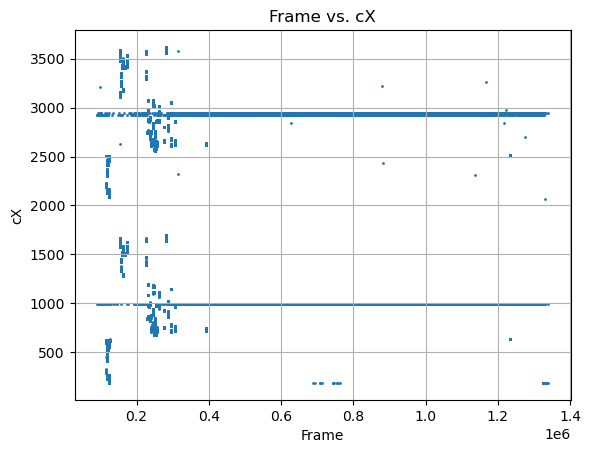

In [6]:
plot_contours('../data/matched_' + output_suffix)

Smoothed data saved to smooth_22Jul2024.tsv
Plot saved to 22Jul2024.png


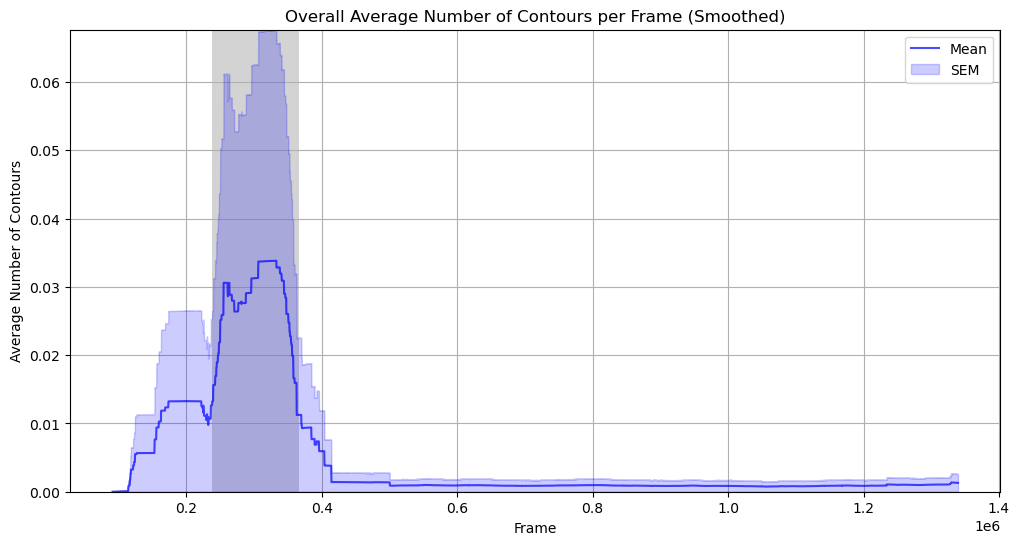

In [7]:
smooth_contours_sem(
    input_file='../data/matched_' + output_suffix,
    outfile_suffix = output_suffix,
    window=108000,
    pad=True,  #Pads beginning with zeros to not get edge artifact
    date = "July 22, 2024" 
)